In [5]:
import open3d as o3d
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_3d_image(file_path):
    # Load the 3D image using Open3D
    pcd = o3d.io.read_point_cloud(file_path)
    return pcd

def preprocess_point_cloud(pcd, voxel_size=0.05):
    # Downsample the point cloud
    pcd_down = pcd.voxel_down_sample(voxel_size)
    return pcd_down

def extract_floor_plan_features(pcd, height_threshold=0.1):
    # Convert point cloud to numpy array
    points = np.asarray(pcd.points)
    
    # Extract floor points by height threshold
    floor_points = points[points[:, 2] < height_threshold]
    
    return floor_points

def generate_floor_plan(floor_points, resolution=0.05):
    # Project the 3D points onto the 2D plane (x, y)
    x_points = floor_points[:, 0]
    y_points = floor_points[:, 1]
    
    # Normalize coordinates to positive values
    x_min, y_min = np.min(x_points), np.min(y_points)
    x_points -= x_min
    y_points -= y_min
    
    # Create a 2D grid
    x_max, y_max = np.max(x_points), np.max(y_points)
    width = int(x_max / resolution) + 1
    height = int(y_max / resolution) + 1
    floor_plan = np.zeros((height, width), dtype=np.uint8)
    
    # Fill the grid
    for x, y in zip(x_points, y_points):
        ix, iy = int(x / resolution), int(y / resolution)
        floor_plan[iy, ix] = 255
    
    return floor_plan

def visualize_floor_plan(floor_plan):
    # Display the floor plan
    plt.imshow(floor_plan, cmap='gray')
    plt.title('Generated Floor Plan')
    plt.show()

def main(file_path):
    # Load and preprocess the 3D image
    pcd = load_3d_image(file_path)
    pcd_down = preprocess_point_cloud(pcd)
    
    # Extract floor plan features
    floor_points = extract_floor_plan_features(pcd_down)
    
    # Generate the floor plan
    floor_plan = generate_floor_plan(floor_points)
    
    # Visualize the floor plan
    visualize_floor_plan(floor_plan)

# Example usage
file_path = "ad.jpg"  # Replace with your 3D image file path
main(file_path)


ImportError: DLL load failed while importing open3d: The specified module could not be found.

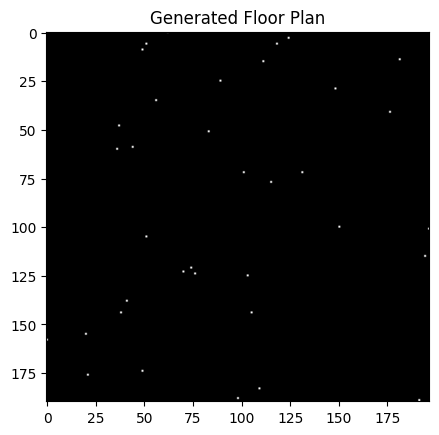

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def mock_3d_data():
    # Generate mock 3D data for demonstration
    num_points = 1000
    x = np.random.uniform(-5, 5, num_points)
    y = np.random.uniform(-5, 5, num_points)
    z = np.random.uniform(0, 3, num_points)  # Height values
    points = np.vstack((x, y, z)).T
    return points

def preprocess_point_cloud(points, voxel_size=0.05):
    # Downsample the point cloud
    voxel_grid = np.floor(points / voxel_size).astype(int)
    _, indices = np.unique(voxel_grid, axis=0, return_index=True)
    downsampled_points = points[indices]
    return downsampled_points

def extract_floor_plan_features(points, height_threshold=0.1):
    # Extract floor points by height threshold
    floor_points = points[points[:, 2] < height_threshold]
    return floor_points

def generate_floor_plan(floor_points, resolution=0.05):
    # Project the 3D points onto the 2D plane (x, y)
    x_points = floor_points[:, 0]
    y_points = floor_points[:, 1]
    
    # Normalize coordinates to positive values
    x_min, y_min = np.min(x_points), np.min(y_points)
    x_points -= x_min
    y_points -= y_min
    
    # Create a 2D grid
    x_max, y_max = np.max(x_points), np.max(y_points)
    width = int(x_max / resolution) + 1
    height = int(y_max / resolution) + 1
    floor_plan = np.zeros((height, width), dtype=np.uint8)
    
    # Fill the grid
    for x, y in zip(x_points, y_points):
        ix, iy = int(x / resolution), int(y / resolution)
        floor_plan[iy, ix] = 255
    
    return floor_plan

def visualize_floor_plan(floor_plan):
    # Display the floor plan
    plt.imshow(floor_plan, cmap='gray')
    plt.title('Generated Floor Plan')
    plt.show()

def main():
    # Generate mock 3D data
    points = mock_3d_data()
    
    # Preprocess the point cloud
    points_down = preprocess_point_cloud(points)
    
    # Extract floor plan features
    floor_points = extract_floor_plan_features(points_down)
    
    # Generate the floor plan
    floor_plan = generate_floor_plan(floor_points)
    
    # Visualize the floor plan
    visualize_floor_plan(floor_plan)

# Run the example
main()


In [9]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def upload_file():
    uploader = widgets.FileUpload(accept='.pcd', multiple=False)
    display(uploader)
    return uploader

def load_point_cloud_from_uploader(uploader):
    for filename, file_info in uploader.value.items():
        content = file_info['content']
        with open(filename, 'wb') as f:
            f.write(content)
        return o3d.io.read_point_cloud(filename)

def preprocess_point_cloud(pcd, voxel_size=0.05):
    pcd_down = pcd.voxel_down_sample(voxel_size)
    return pcd_down

def extract_floor_plan_features(pcd, height_threshold=0.1):
    points = np.asarray(pcd.points)
    floor_points = points[points[:, 2] < height_threshold]
    return floor_points

def generate_floor_plan(floor_points, resolution=0.05):
    x_points = floor_points[:, 0]
    y_points = floor_points[:, 1]
    
    x_min, y_min = np.min(x_points), np.min(y_points)
    x_points -= x_min
    y_points -= y_min
    
    x_max, y_max = np.max(x_points), np.max(y_points)
    width = int(x_max / resolution) + 1
    height = int(y_max / resolution) + 1
    floor_plan = np.zeros((height, width), dtype=np.uint8)
    
    for x, y in zip(x_points, y_points):
        ix, iy = int(x / resolution), int(y / resolution)
        floor_plan[iy, ix] = 255
    
    return floor_plan

def visualize_floor_plan(floor_plan):
    plt.imshow(floor_plan, cmap='gray')
    plt.title('Generated Floor Plan')
    plt.show()

def main():
    uploader = upload_file()
    display(widgets.Button(
        description='Process File',
        disabled=False,
        button_style='',
        tooltip='Click me',
        icon='check'
    ).on_click(lambda b: process_uploaded_file(uploader)))

def process_uploaded_file(uploader):
    if uploader.value:
        pcd = load_point_cloud_from_uploader(uploader)
        pcd_down = preprocess_point_cloud(pcd)
        floor_points = extract_floor_plan_features(pcd_down)
        floor_plan = generate_floor_plan(floor_points)
        visualize_floor_plan(floor_plan)
    else:
        print("Please upload a 3D point cloud file.")

main()


ImportError: DLL load failed while importing open3d: The specified module could not be found.

In [11]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def upload_file():
    uploader = widgets.FileUpload(accept='.pcd', multiple=False)
    display(uploader)
    return uploader

def load_point_cloud_from_uploader(uploader):
    for filename, file_info in uploader.value.items():
        content = file_info['content']
        with open(filename, 'wb') as f:
            f.write(content)
        return o3d.io.read_point_cloud(filename)

def preprocess_point_cloud(pcd, voxel_size=0.05):
    pcd_down = pcd.voxel_down_sample(voxel_size)
    return pcd_down

def extract_floor_plan_features(pcd, height_threshold=0.1):
    points = np.asarray(pcd.points)
    floor_points = points[points[:, 2] < height_threshold]
    return floor_points

def generate()


SyntaxError: expected ':' (673425474.py, line 28)